Function "myperceptron" is my final deliverable work. It can accept a data frame with three columns(must be x1,x2,y), and    
(1) If it can reach 100% accuracy on the data in a reasonable time, it should output number of iterations, visualization results,final weight vector, final confusion matrix    
(2) else it should judge the data set is linearly inseparable

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

def f(x,y,W):
    '''this is target function.'''
    if(W[0]+W[1]*x+W[2]*y>=0):
        return 1
    else:
        return -1
    
def predect(W,f,df):
    '''this function calculate the predected vector by the given target function'''
    pred=[]
    for i in range(df.shape[0]):
        pred.append(f(df.x1[i],df.x2[i],W))
    return pred


def update_w(W,yp,df):
    '''this function calculate the next W by the predected vector'''
    l=[i for i in range(len(yp))]
    random.shuffle(l)
    for i in range(len(l)):
        if(yp[l[i]]!=df.y[l[i]]):
            y=df.y[l[i]]
            x1=df.x1[l[i]]
            x2=df.x2[l[i]]
            return [W[0]+y,W[1]+x1*y,W[2]+x2*y]  
    return W

def get_cm(yp,ya):
    '''this function use Predicted vector and Actual vector to calculate confusion matrix'''
    TT,TF,FT,FF=0,0,0,0
    for i in range(len(yp)):
        if((yp[i]==1)and(ya[i]==1)):
            TT=TT+1
        elif((yp[i]==1)and(ya[i]==-1)):
            TF=TF+1
        elif((yp[i]==-1)and(ya[i]==1)):
            FT=FT+1
        elif((yp[i]==-1)and(ya[i]==-1)):
            FF=FF+1
    return [[TT,TF],[FT,FF]]

def plot_result(W,pred,df):
    k=(df.x2.max()-df.x2.min())/(df.x1.max()-df.x1.min())
    plt.figure(figsize = (8,8*k))
    # plot the classification results 
    plt.xlabel("x axis")
    plt.ylabel("y axis")
    Xs=[]
    Ys=[]
    for i in range(len(df.y)):
        if(pred[i]==1):
            Xs.append(df.x1[i])
            Ys.append(df.x2[i])
    Xf=[]
    Yf=[]
    for i in range(len(df.y)):
        if(pred[i]==-1):
            Xf.append(df.x1[i])
            Yf.append(df.x2[i])
    plt.scatter(Xs,Ys,color='r',marker='*', s=30, label='success')
    plt.scatter(Xf,Yf,color='b',marker='^', s=30, label='failture')
    
    # plot the chosen line
    a = np.linspace(df.x1.min(),df.x1.max())
    b = -W[1]*a/W[2]-W[0]/W[2]
    plt.plot(a,b,color='y')
    plt.legend(loc='upper right')

    plt.show()
    
def myperceptron(df):
    '''this function can accept a data frame with three columns(x1,x2,y), 
    train the perceptron to return final weight vector and confusion matrix
    or determine that the data set is linearly inseparable'''
    # initialize the weight vector "W" 
    W=[0,0,0]
    # iterate to update W 
    for i in range(10000):
        # Classify the Data
        pred=predect(W,f,df)
        # Update the Weights
        W1=update_w(W,pred,df)
        # Generate the Confusion Matrix
        cm=get_cm(pred,df.y)
        # If the updated W is equal to W, it means that W has converged
        # so that wo can return W and Confusion Matrix and end the program
        if(W1==W):
            print("After",i,"iterations, the weight vector converges, and the data set is linearly separable.")
            print("The visualization results on this data set are as follows: ")
            plot_result(W,pred,df)
            return W,cm
        W=W1
    # If i reach 10000 and W has not converged,
    # We judge that W does not converge and the data set is linearly inseparable
    print("We were unable to converge to a set of weights that correctly classifies the data. These data may not be linearly separable.")
    return


A test, call myperceptron(data frame) to judge whether the data set is linearly separable

In [2]:
np.random.seed(123)
Xm=np.random.uniform(-10, 10, 30)
np.random.seed(321)
Ym=np.random.uniform(-10, 10, 30)
T=[]
for i in range(len(Xm)):
    if(3*Xm[i]+2*Ym[i]-9>0):
        T.append(1)
    else:
        T.append(-1)
# package Xm,Ym and T together into a data frame
df_m=pd.DataFrame(Xm, columns=['x1'])
df_m=pd.concat([df_m, pd.DataFrame(Ym,columns=['x2'])],axis=1)
df_m=pd.concat([df_m, pd.DataFrame(T,columns=['y'])],axis=1)
df_m

,x1,x2,y
0,3.929384,7.718959,1
1,-4.277213,-8.441753,-1
2,-5.462971,9.592923,-1
3,1.026295,-5.046571,-1
4,4.389379,5.057694,1
5,-1.537871,0.533513,-1
6,9.615284,8.151075,1
7,3.696595,7.681406,1
8,-0.381362,-8.214621,-1
9,-2.157650,0.346892,-1


After 29 iterations, the weight vector converges, and the data set is linearly separable.
The visualization results on this data set are as follows: 


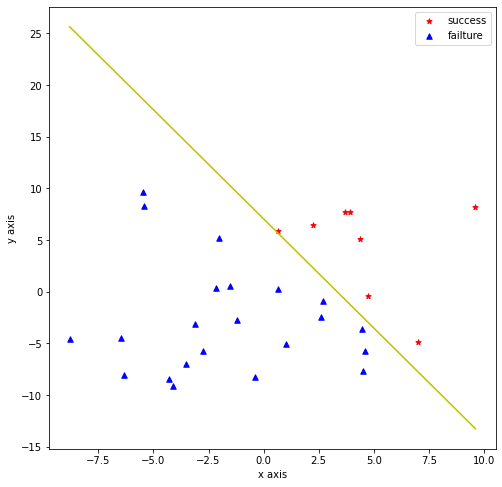

([-21, 6.298866344280871, 2.983379946996501], [[8, 0], [0, 22]])

In [3]:
myperceptron(df_m)